# Complex Mappings

A visualisation of a few examples of complex mappings via a simple `python` API.

In [1]:
%matplotlib notebook
%run api.py

# constants
PI = np.pi
TAU = 2 * PI
HALF_PI = PI / 2

The API provides the functions:
- `init_grid`: creates complex gridlines points
- `init_polar`: creates complex polar coordinate points
- `plot_map`: plots color-coded curves in the complex plane

<IPython.core.display.Javascript object>


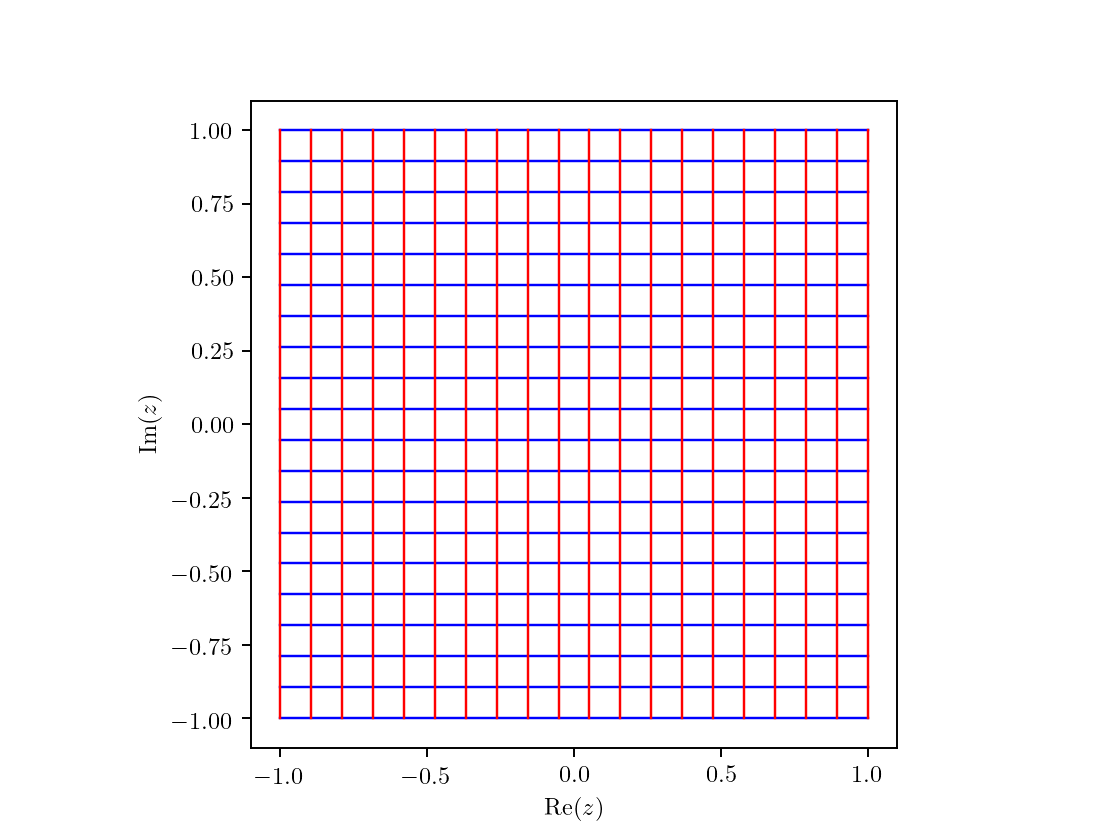

In [2]:
grid = init_grid()
plot_map(grid, map=None)

<IPython.core.display.Javascript object>


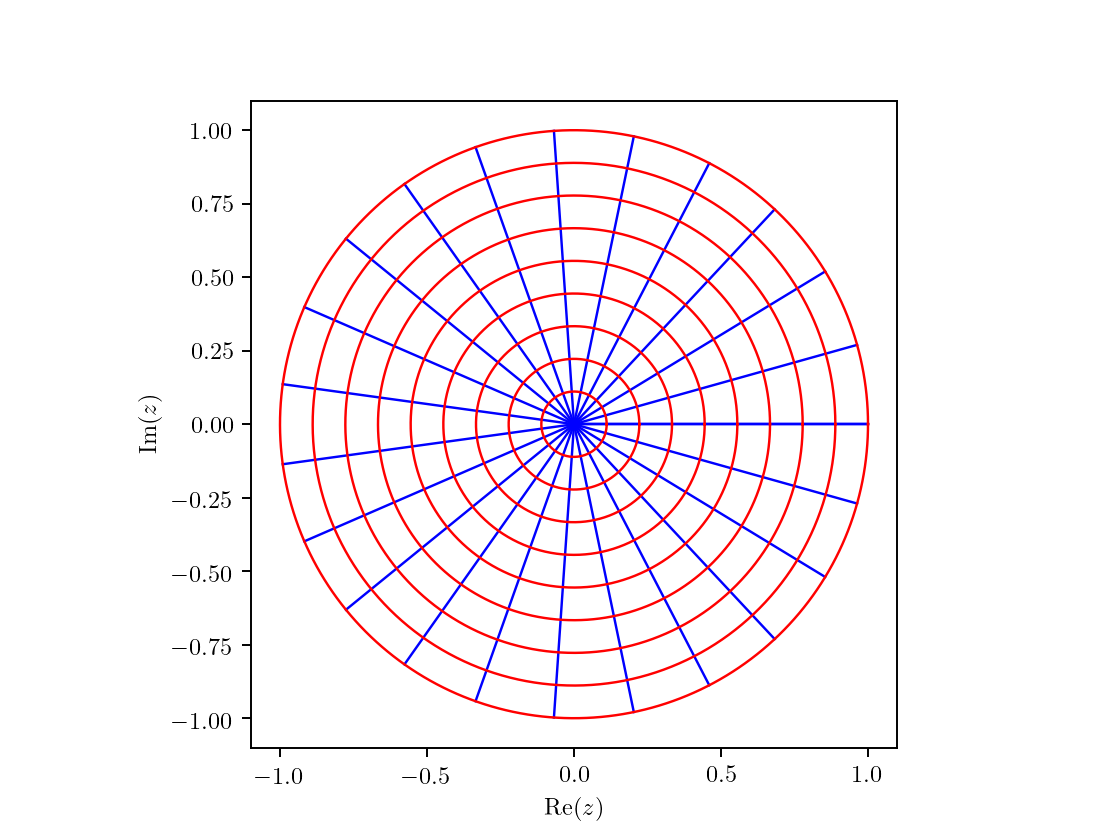

In [3]:
polar = init_polar()
plot_map(polar, map=None)

## Mappings

In this section we will explore a few examples of complex mappings.
Throughout this notebook we will use the following notation:

- $z = x + i y$ where $x$ and $y$ are real variables
- $w = f(z) = u(x,y) + i v(x,y)$ where $u$ and $v$ are real-valued functions

For polar coordinates:
- $z = r\cdot e^{i\theta}$ where $r$ and $\theta$ are real variables
- $w = f(z) = \rho(r,\theta)\cdot e^{i \varphi(r,\theta)}$ where $\rho$ and $\varphi$ are real-valued functions

### Rotation
The rotation by an angle $\alpha$ is defined by the transformation
$$ f(z) = z\cdot e^{i\alpha} $$

Which can be easily deduced from the polar form
$ f(z) = r\cdot e^{i(\theta+\alpha)} \rightarrow\begin{cases}\rho=r\\ \varphi=\theta+\alpha\end{cases}$

Let's see how the cartesian grid is transformed for $\alpha=\frac{\pi}{6}$

<IPython.core.display.Javascript object>


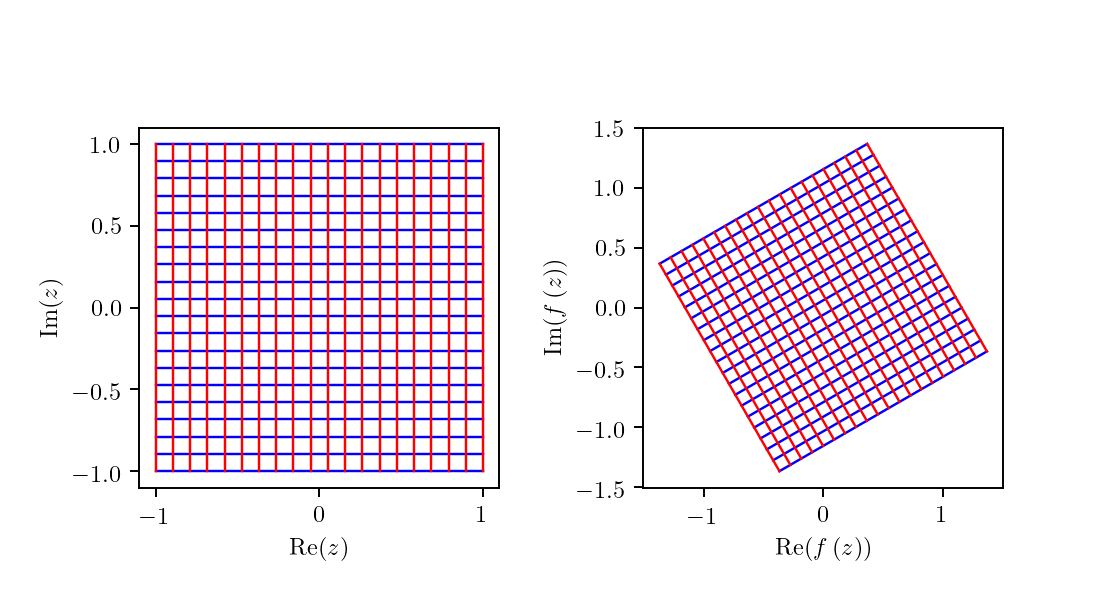

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4ea1f7490>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4e99e5fd0>)

In [4]:
rotation = lambda z : z * np.exp(1j * PI / 6)
plot_map(grid, rotation)

<IPython.core.display.Javascript object>


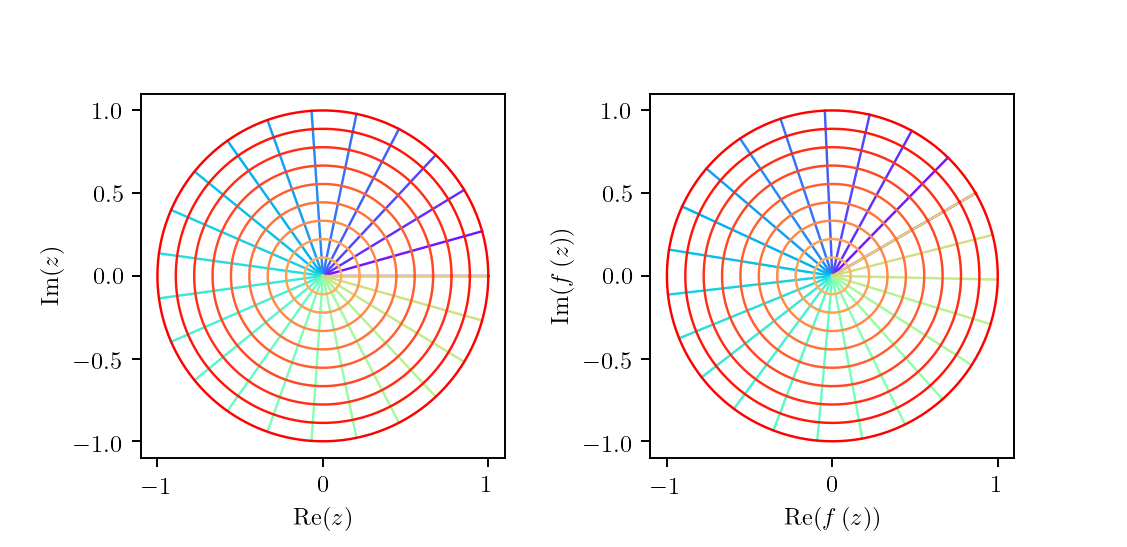

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4e9116750>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4e90e7c10>)

In [5]:
plot_map(polar, rotation, color_each=True)

### The Square Function

The function $ f(z) = z^2 $ transforms the cartesian grid into a family of parabolas.

$$ f(z) = (x+iy)^2 = \underbrace{(x^2-y^2)}_{u(x,y)} + i\underbrace{(2xy)}_{v(x,y)} $$

<IPython.core.display.Javascript object>


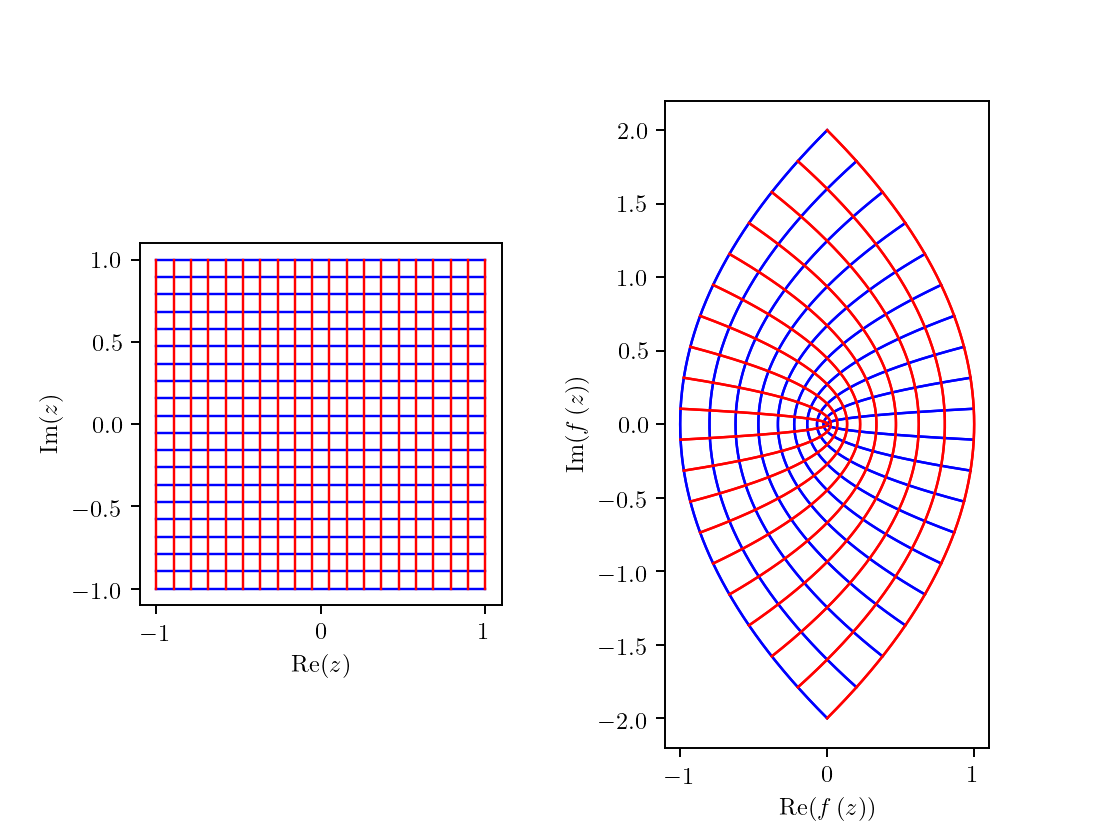

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4e881d410>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4e883bd10>)

In [6]:
square = lambda z : z ** 2
plot_map(grid, square)

as for the polar grid,
$ f(z) = (r\cdot e^{i\theta})^2 = \underbrace{r^2}_{\rho} \cdot ^{i\underbrace{(2\theta)}_{\varphi}} $
the transformation doubles the argument of $z$ and distorts its modules quadratically $\rho=r^2$.

<IPython.core.display.Javascript object>


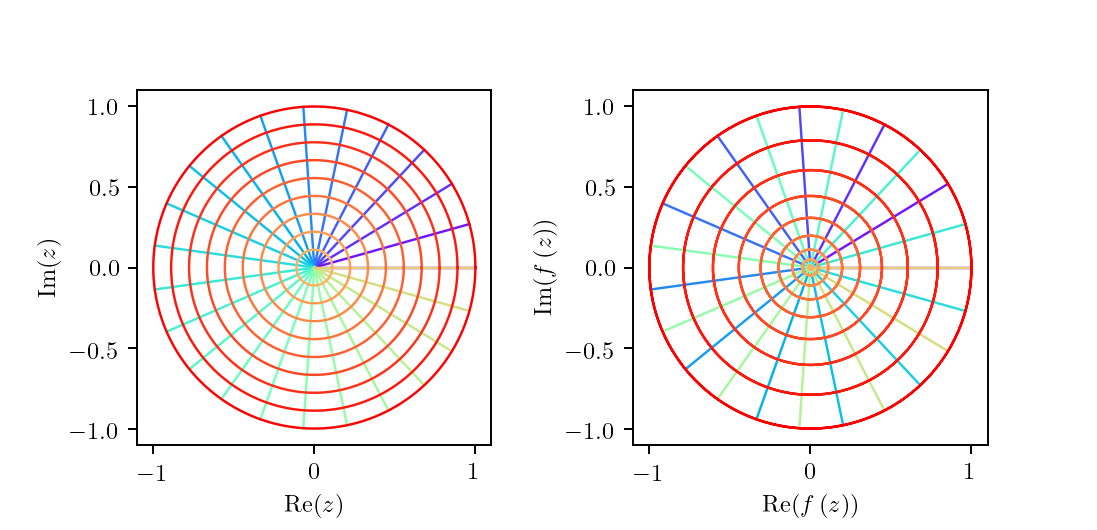

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4e8333f90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4e82e1c50>)

In [7]:
plot_map(polar, square, color_each=True)

### The Square Root Function

$$ f:z\mapsto \sqrt{z} $$

<IPython.core.display.Javascript object>


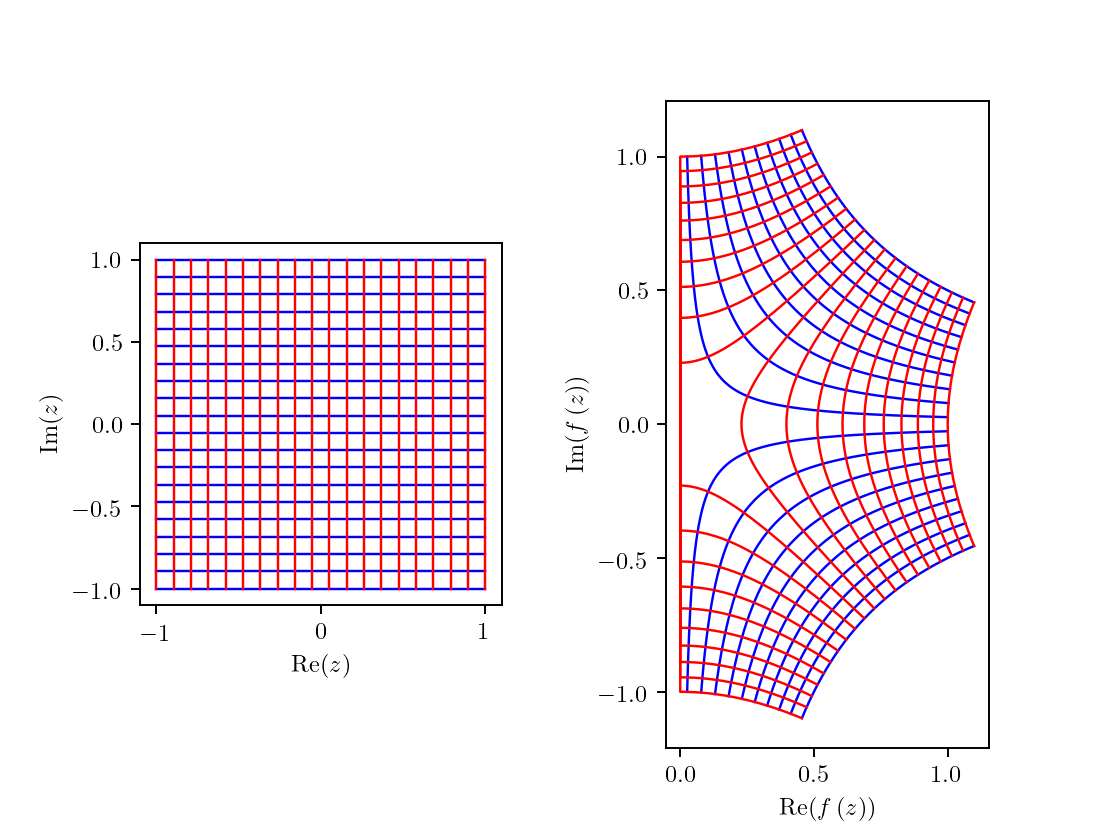

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4e818e450>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4e91166d0>)

In [8]:
plot_map(grid, np.sqrt)

### $f(z)=z^{\frac{3}{2}}$

<IPython.core.display.Javascript object>


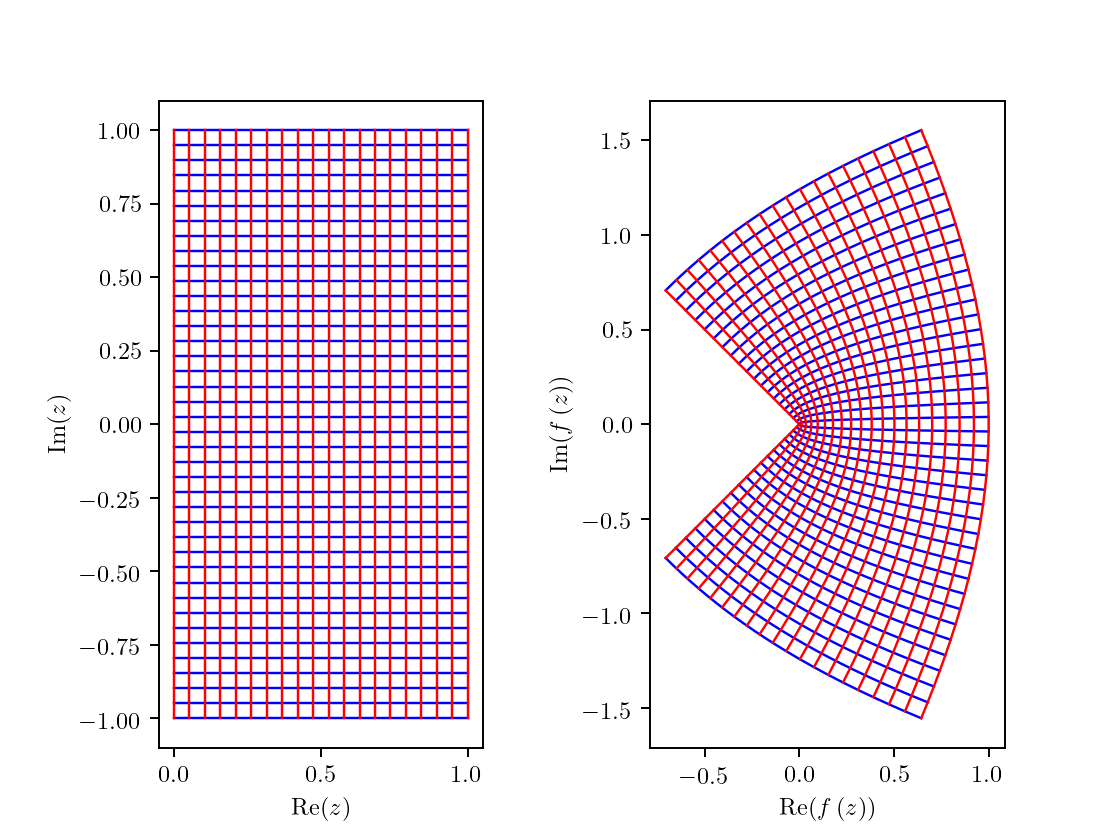

(<matplotlib.axes._subplots.AxesSubplot at 0x7fd4e972c9d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd4e96d3c90>)

In [9]:
half_grid = init_grid(xlim=(0, 1), step=0.05)
plot_map(half_grid, lambda z : z ** (3/2))

### $ f(z) = \frac{1}{z} $

<IPython.core.display.Javascript object>


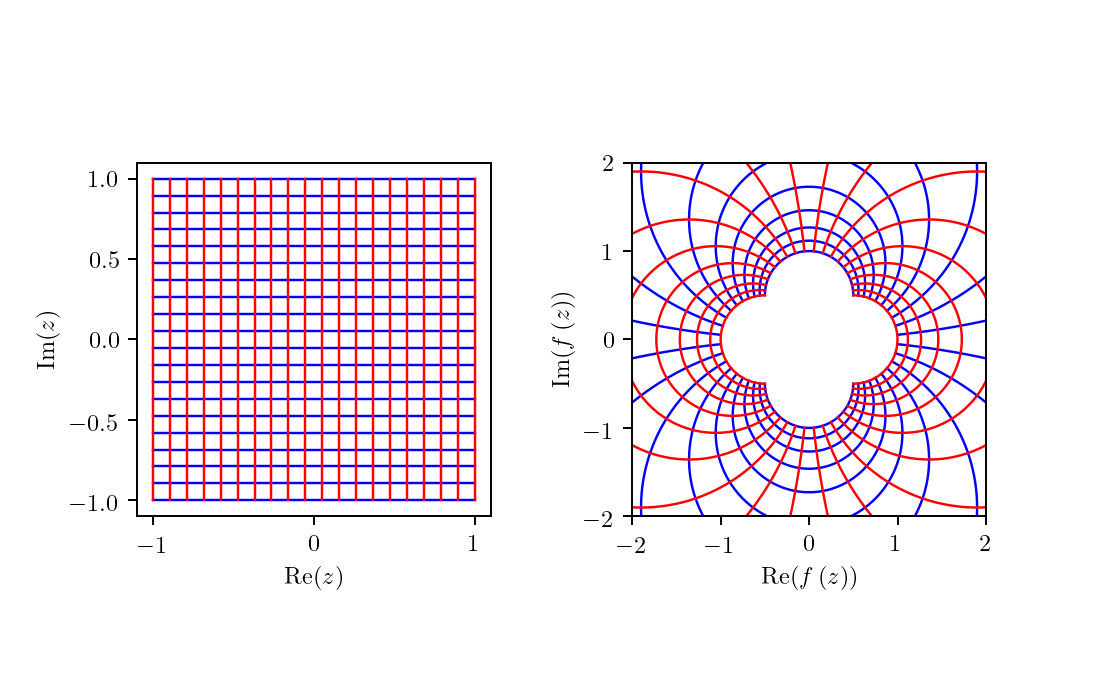

(-2, 2)

In [10]:
inverse = lambda z: 1.0/z if z != 0 else np.nan
_, img = plot_map(grid, inverse)
img.set_xlim(-2, 2)
img.set_ylim(-2, 2)

<IPython.core.display.Javascript object>


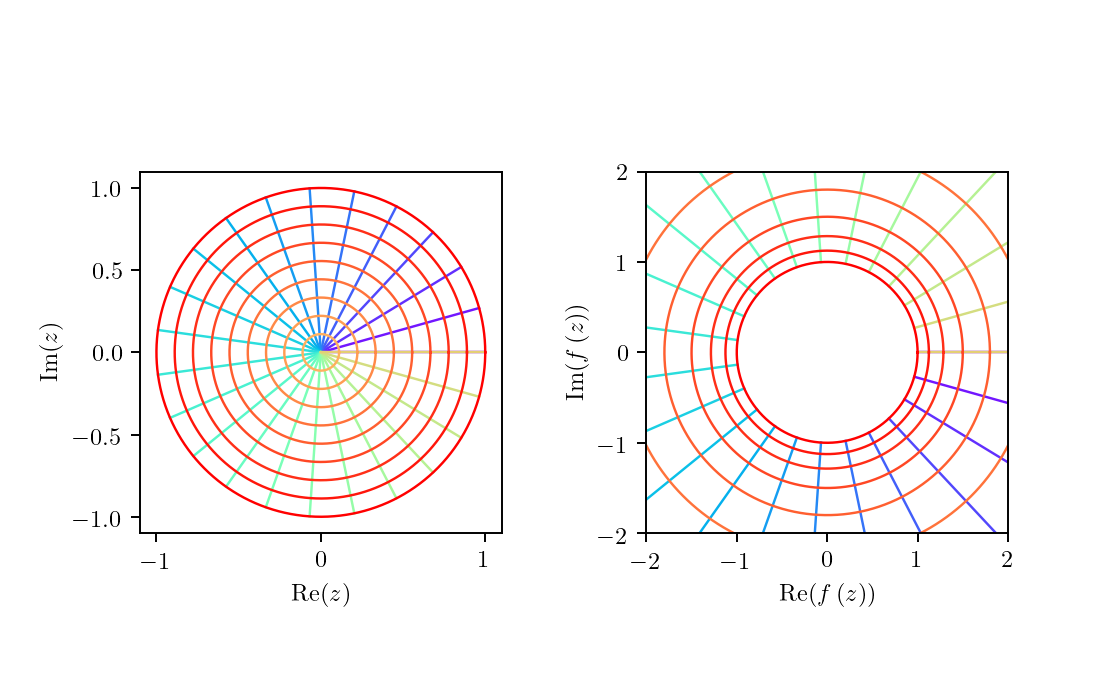

(-2, 2)

In [11]:
_, img = plot_map(polar, inverse, color_each=True)
img.set_xlim(-2, 2)
img.set_ylim(-2, 2)

## Periodic Functions

A function is $P$-periodic if $\forall z\in D_f\subset\mathbb{C},f(z)=f(z+P)$.

- If $P\in\mathbb{R}$ then $f$ is only periodic along the real axis
- If $P$ is purely imaginary (i.e. $\mathrm{Re}(P)=0$) then $f$ is only periodic along the imaginary axis

### The Exponential Function

The exponential function is $2\pi i$-periodic having
$$ f(z) = e^z = e^{x+iy} = e^x e^{iy} = e^x (\cos y+i\sin y) $$

- $f(x+iy_0)$ plots a semi-line from the origin (excluded) making an angle $y_0$ with the real axis.
- $f(x_0+iy)$ plots a circle whose radius is $e^{x_0}$.

<IPython.core.display.Javascript object>


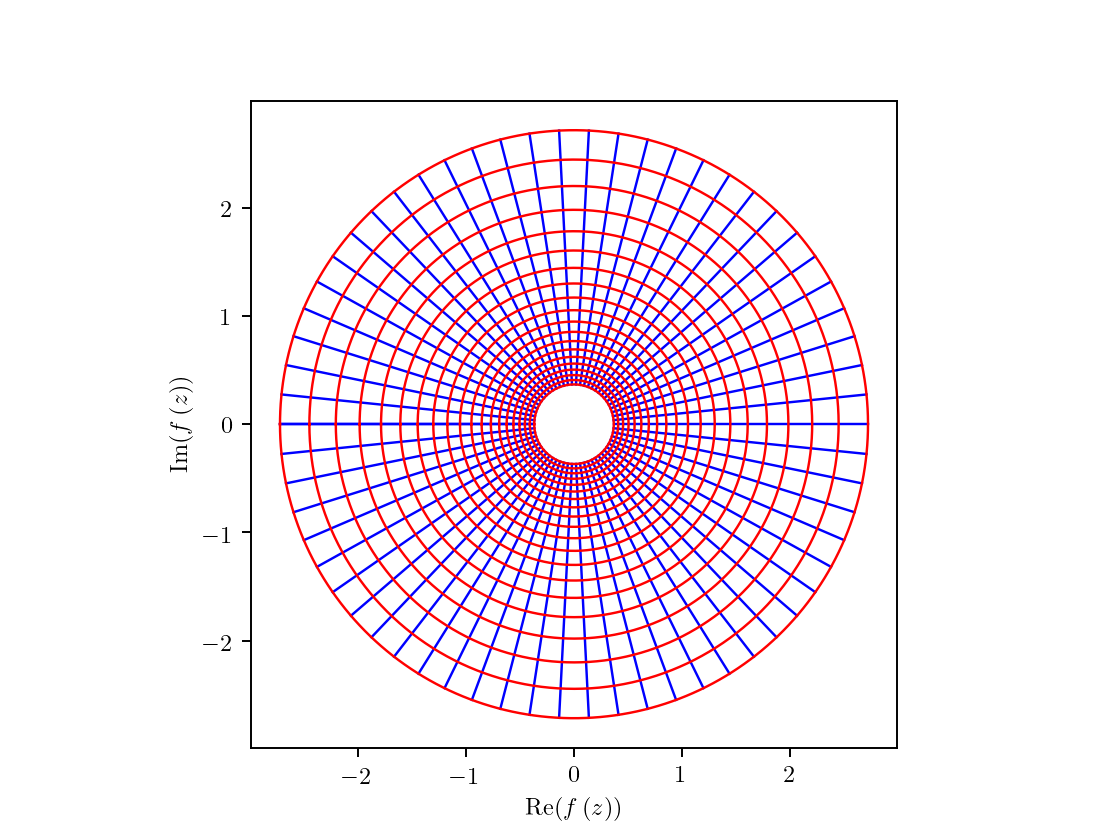

In [12]:
plot_map(init_grid(ylim=(-PI,PI)), np.exp, plot_domain=False, linewidth=1)

### Trigonometric Functions

The expression of the complex cosine function is given as:

\begin{align}
f(z) &= \cos z \\
&= \frac{1}{2} \left( e^{iz} + e^{-iz} \right) \\
&= \frac{1}{2} \left( e^{i(x+iy)} + e^{-i(x+iy)} \right) \\
&= \frac{1}{2} \left( e^{-y+ix} + e^{y-ix} \right) \\
&= \frac{1}{2} \left( e^{-y}(\cos x +i\sin x) + e^{y}(\cos x-i\sin x) \right) \\
&= \cos x \frac{e^y+e^{-y}}{2}- i\sin x \frac{e^y-e^{-y}}{2} \\
&= \cos x \cosh y -i\sin x \sinh y
\end{align}

We can deduce from this formula that:
- $f(x+iy_0)$ plots an ellipse whose semi-axes are $(\cosh y_0, |\sinh y_0|)$.
- $f(x_0+iy)$ plots a branch of a hyperbola whose semi-axes are $(\cos x_0, |\sin x_0|)$.

<IPython.core.display.Javascript object>


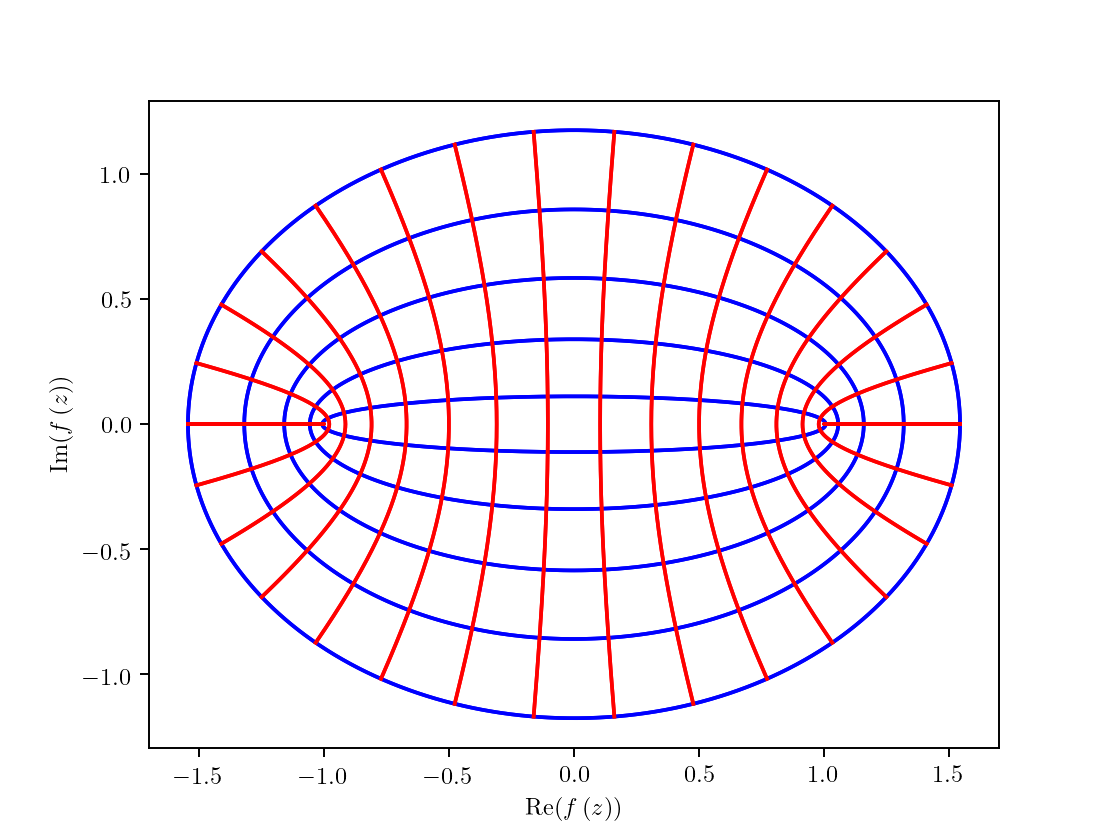

In [13]:
trig_grid = init_grid(xlim=(-PI, PI), step=0.2)
plot_map(trig_grid, np.cos, plot_domain=False, linewidth=1.5)

Similarly for the sine function:
$$ \sin(z)=\sin(x+iy)= \sin x \cosh y +i\cos x \sinh y $$

Therefore
- $f(x+iy_0)$ plots an ellipse whose semi-major axes are $(\cosh y_0, \sinh y_0)$
- $f(x_0+iy)$ plots a hyperbola whose semi-major axes are $(\sin x_0, \cos x_0)$

<IPython.core.display.Javascript object>


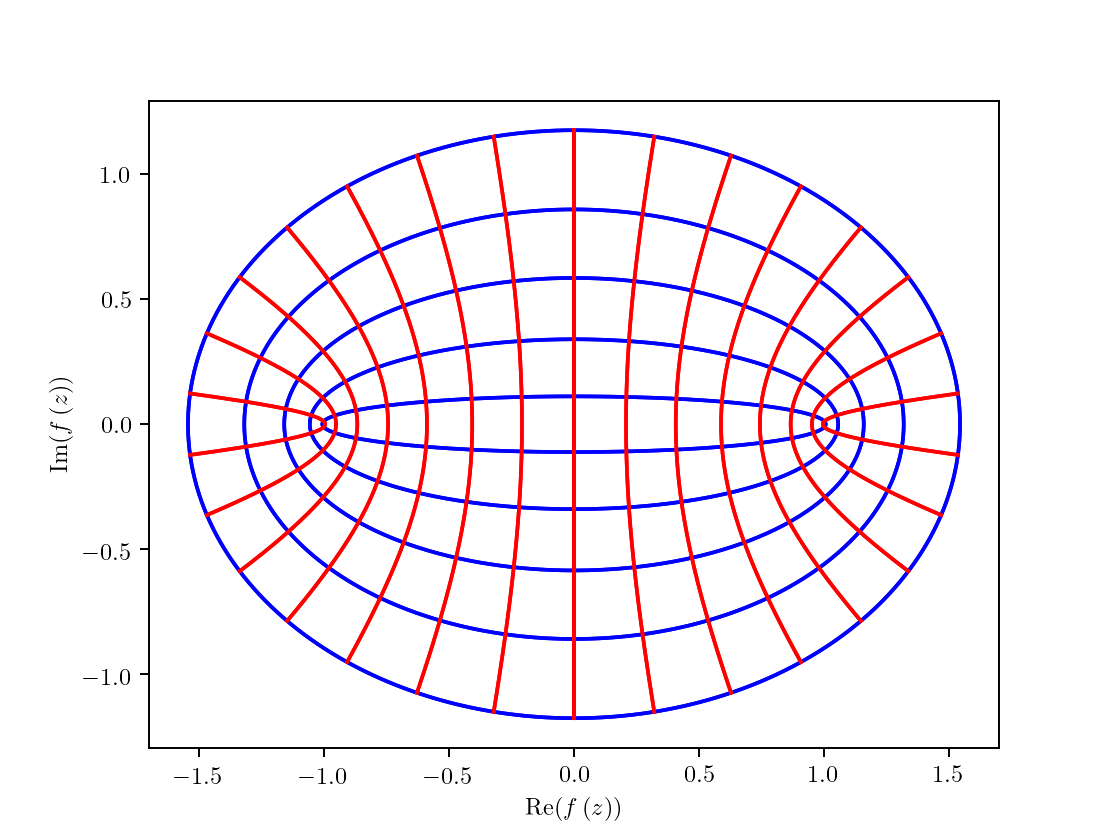

In [14]:
plot_map(trig_grid, np.sin, plot_domain=False, linewidth=1.5)

As for the tangent function:

\begin{align}
\tan(z) &= \frac{\sin z}{\cos z} \\
&= i\frac{e^{iz}-e^{-iz}}{e^{iz}+e^{-iz}}\cdot \frac{\cosh z}{\cosh z}\\
&= i\frac{e^{y-ix}-e^{ix-y}}{e^{y-ix}+e^{ix-y}}\frac{e^{y+ix}+e^{-ix-y}}{e^{y+ix}+e^{-ix-y}}\\
&= i\frac{e^{2y}-e^{-2y}+e^{-2ix}-e^{2ix}}{e^{2y}+e^{-2ix}+e^{2ix}+e^{-2y}}\\
&= \frac{\sin(2x)+i\sinh(2y)}{\cosh(2y)+\cos(2x)}
\end{align}

<IPython.core.display.Javascript object>


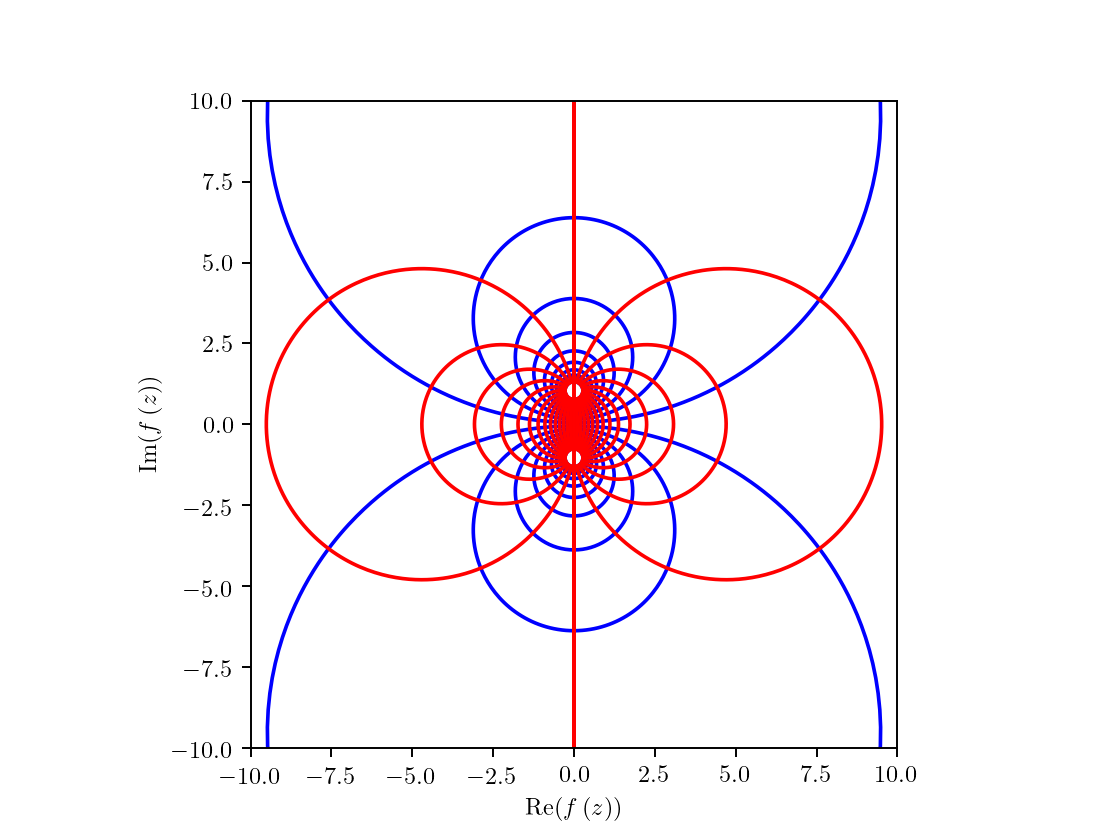

(-10, 10)

In [15]:
img = plot_map(init_grid(xlim=(-PI/2,PI/2)), np.tan, plot_domain=False, linewidth=1.5)
img.set_xlim(-10, 10)
img.set_ylim(-10, 10)

### The Complex Logarithm

The complex logarithm is the inverse of exponential function.
However, since the complex exponential is periodic (therefore not injective) the complex logarithm is *not a function*.

Nevertheless, the properties of the logarithm still hold, but unlike the real logarithm any non-zero complex number has a logarithm, in fact it has infinitely-many logarithms.

$\ln(z)=\ln(r\cdot e^{i\theta})=\ln r + \ln e^{i\theta} = \ln r + i\theta$

Moreover, $\forall \theta\in\mathbb{R}, \forall n\in\mathbb{Z}, e^{i\theta} = e^{i(\theta+2\pi n)}$ consequently
$\forall z\in\mathbb{C}\setminus\{1\}, \ln z = \ln r + i(\theta + 2\pi n), \forall n\in\mathbb{Z}$.

<IPython.core.display.Javascript object>


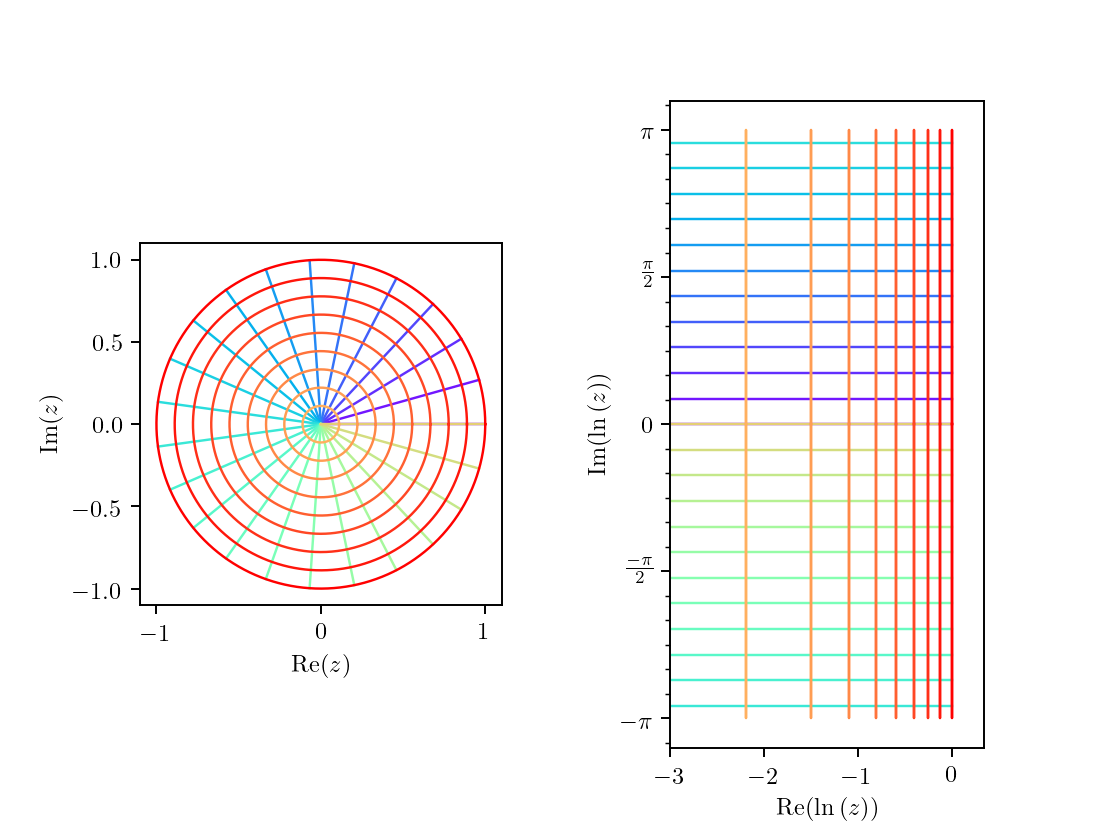

In [16]:
ln = lambda z: np.log(z) if np.abs(z) > 0 else np.nan
_, ax = plot_map(polar, ln, color_each=True, func='\\ln')
ax.set_xlim(left=-3)
set_ticks(ax.yaxis, PI / 2, PI / 12)

<IPython.core.display.Javascript object>


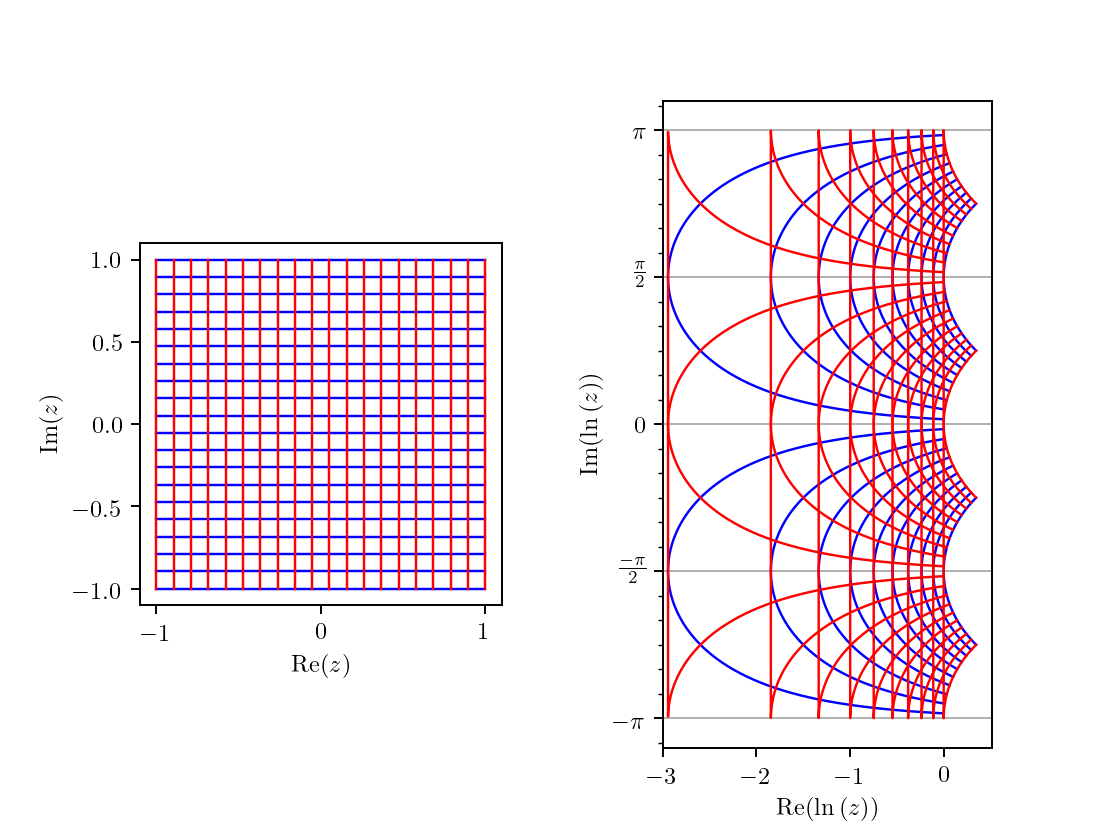

In [17]:
_, img = plot_map(grid, ln, func='\\ln')
img.set_xlim(left=-3)
set_ticks(img.yaxis, PI / 2, PI / 12)
img.yaxis.grid(True)

## Riemann Zeta Function

The Riemann zeta function is extremely important in complex analysis and in a number of applications, especially the Riemann hypothesis regarding prime numbers.

The zeta function is defined as the analytic continuation of the series
$$ \zeta(s) = \sum_{n=1}^{\infty} \frac{1}{n^s} $$

defined for $\mathrm{Re}(s)>1$, which can also be expressed as the following integral
$$ \zeta(s) = \frac{1}{\Gamma(s)} \int_{0}^{\infty} \frac{x^{s-1}}{e^x-1} \mathrm{d}x $$

where $\Gamma$ is the gamma function
$$ \Gamma(s) = \int_{0}^{\infty} x^{s-1}e^{-x} \mathrm{d}x $$

### Plotting the zeta function

The numerical evaluation of the zeta function is very costly.
Nevertheless, the library `mpmath` provides a great approximation of the zeta function (even for $\mathrm{Re}(s)<1$).

In order to get a better view of the function behavior, more gridlines are needed in the neighborhood of $s=1$.

<IPython.core.display.Javascript object>


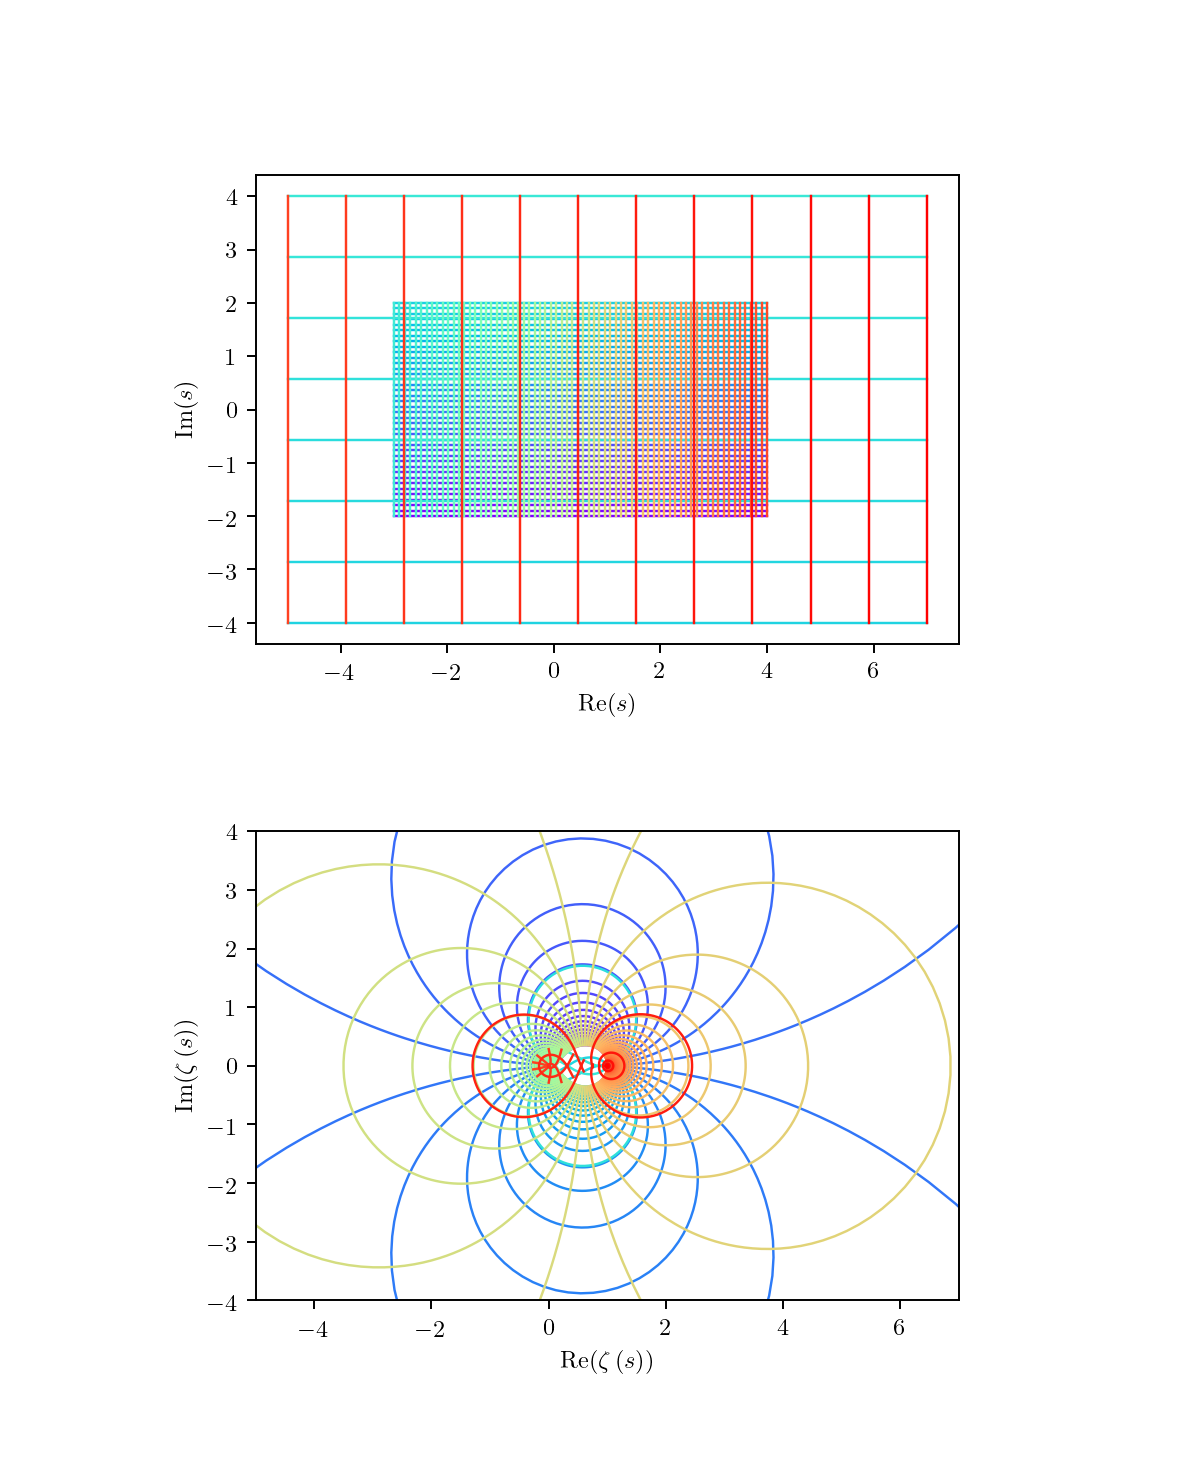

(-4, 4)

In [18]:
small_grid = init_grid(xlim=(-3, 4), ylim=(-2, 2), step=0.1, nb_pts=500)
big_grid = init_grid(xlim=(-5, 7), ylim=(-4, 4), step=1, nb_pts=500)
zeta_grid = (small_grid[0] + big_grid[0], small_grid[1] + big_grid[1])

from mpmath import mp, zeta
mp.pretty = True
mp.dps = 7

_, ax = plot_map(zeta_grid, zeta, align='vertical', var='s', func='\\zeta', color_each=True)
ax.set_xlim(-5,7)
ax.set_ylim(-4,4)

A common visualisation of a complex mapping $f$ is *domain coloring*, where
- $\arg{f(z)}$ is shown as color (hue)
- $\left\lvert f(z) \right\rvert$ is shown as color brightness

<IPython.core.display.Javascript object>


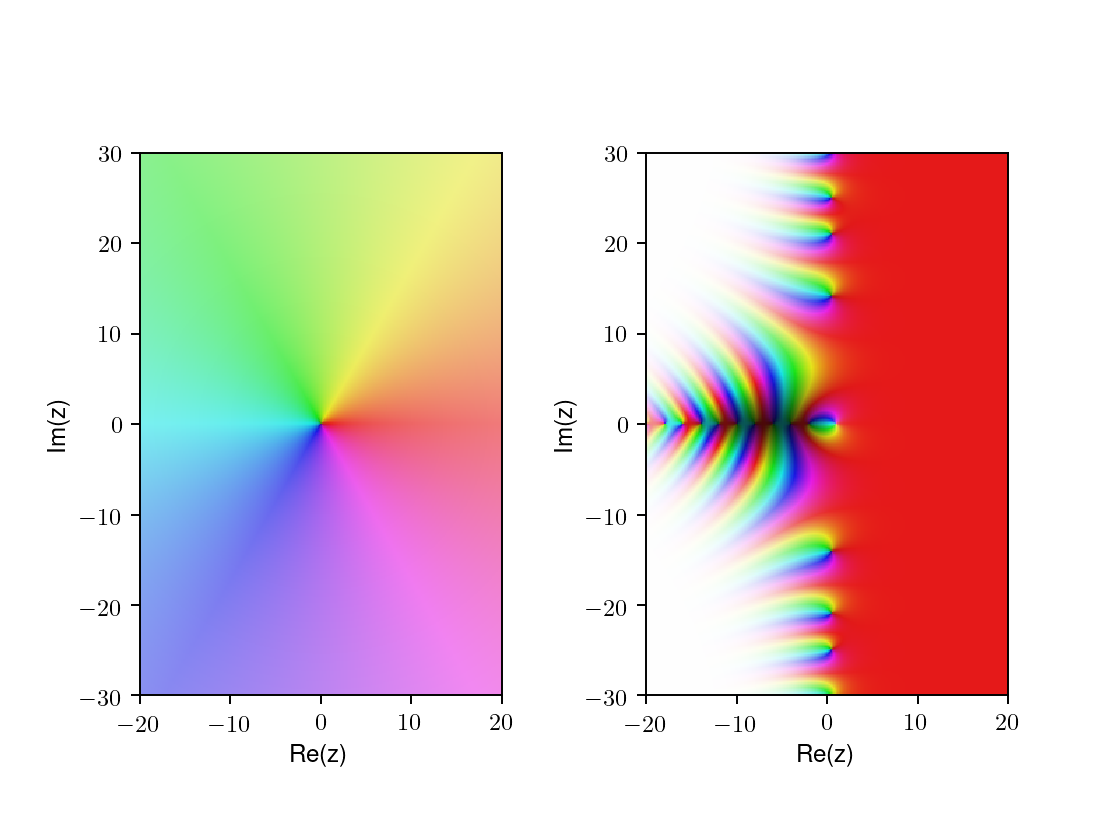

In [19]:
from mpmath import cplot
fig, (dom, img) = plt.subplots(nrows=1, ncols=2); fig.subplots_adjust(wspace=.4)
cplot(lambda z: z, re=[-20, 20], im=[-30, 30], points=100000, axes=dom)
cplot(zeta, re=[-20, 20], im=[-30, 30], points=100000, axes=img)

## Riemann Hypothesis

### Trivial Zeros

The zeta function satisfies the following functional equation
$$ \zeta(s) = 2^s \pi^{s-1} \sin\left(\frac{\pi s}{2}\right) \Gamma(1-s)\zeta(1-s) $$

which shows that $\forall n\in\mathbb{N}\setminus\{0\}, \zeta(-2n)=0$.

### Non-trivial Zeros

Non-trivial zeros of the zeta function lie in the open strip
$ \left\{s\in\mathbb{C} : \mathrm{Re}(s)\in ]0,1[ \right\} $
which is called the **critical strip**.

The Riemann hypothesis postulates that all non-trivial zeros lie on the **critical line** defined as
$$ \left\{ \frac{1}{2} +it : t\in\mathbb{R} \right\} $$
which remains unproven to this day.
It is worth noting that a proof was published last year (September 2018) by the Fields Medal laureate *Michael Atiyah*. However, his proof was met with skepticism by most mathematicians.

<IPython.core.display.Javascript object>


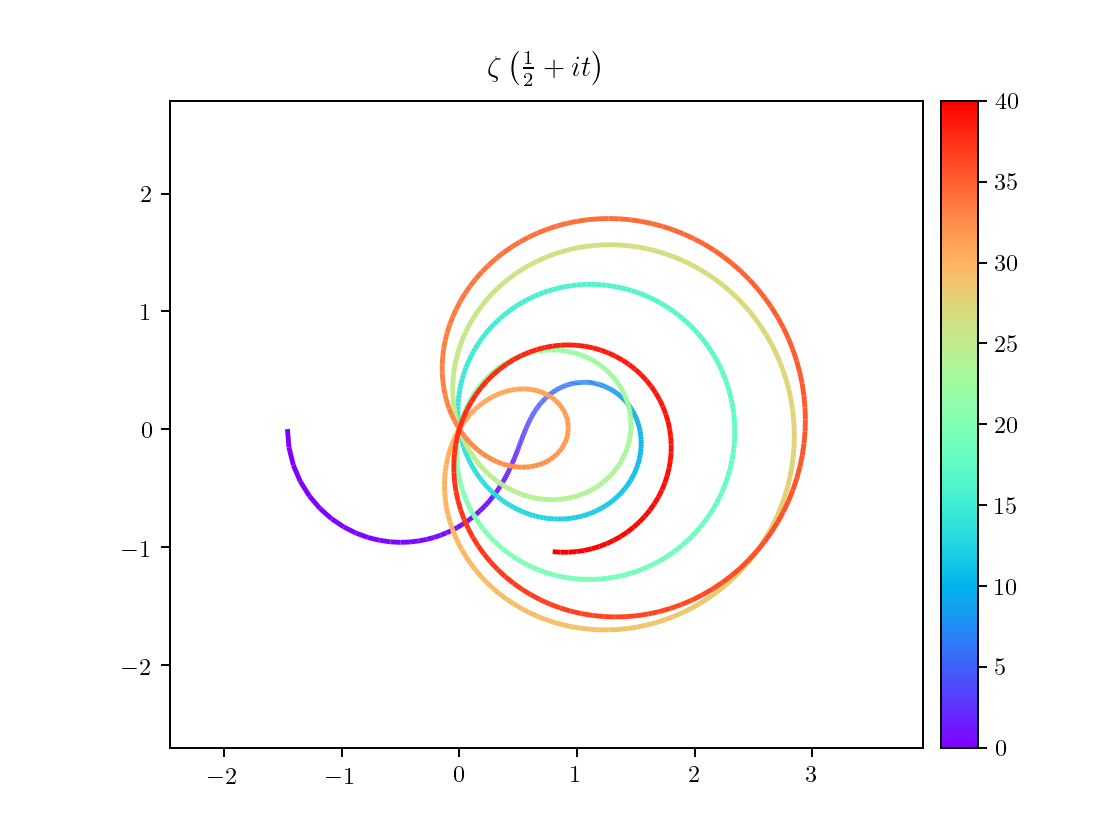

Text(0.5, 1.0, '$\\zeta\\left(\\frac{1}{2} + it\\right)$')

In [20]:
t = np.linspace(0, 40, 1000)
s = 0.5 + (1j * t)
critical = np.array([zeta(z) for z in s], dtype=complex)
ax, _ = plot_gradient_line(critical.real, critical.imag, norm=t, linewidth=2)
ax.set_title(r'$\zeta\left(\frac{1}{2} + it\right)$')

### Euler Product

The zeta function is closely related to prime numbers, Euler has proved in 1737 that
$$ \zeta(s) = \prod_{p~\text{prime}} \frac{1}{1-p^{-s}} $$

which allows subsequently to calculate the number of primes less than a given value.